In [15]:
import xarray as xr 
import geopandas as gpd
import geoplot 
import logging
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.cluster import hierarchy
from shapely.ops import cascaded_union
from matplotlib.colors import ListedColormap
import seaborn as sns
from shapely.geometry import box
#import earthpy as et

# import spagat.dataset as spd
import metis_utils.io_tools as ito
import metis_utils.plot_tools as pto
import metis_utils.time_tools as tto

# Import shapefile

In [18]:
my_list = ['de', 8]
my_list

['de', 8]

In [37]:
res = str(my_list)[1:-1]
res

"'de', 8"

In [32]:
 print(res)

'de', 8


In [2]:
path_to_ehighwayfile = "/home/s-patil/data/e-highway"

In [33]:
res2

In [3]:
ehighway_shapefile = gpd.read_file(path_to_ehighwayfile, layer='e-highway_sev-full')

In [6]:
#using ito 
gdf = ito.read_ehighway_shapefile(geokit=False, SHP_PATH="/home/s-patil/data/e-highway/e-highway_sev-full.shp")

In [7]:
gdf 

,isOffshore,NUTS_ID,e-id,doSim,ISO,NRW,Germany,Europe,Central,geometry
0,0,ES111,01_es,1,ESP,0,0,1,0,"MULTIPOLYGON (((2773867.155 2316315.102, 27735..."
1,0,ES120,02_es,1,ESP,0,0,1,0,"MULTIPOLYGON (((3246323.196 2328445.769, 32446..."
2,0,ES411,03_es,1,ESP,0,0,1,0,"MULTIPOLYGON (((3191850.084 2048908.768, 31917..."
3,0,ES220,04_es,1,ESP,0,0,1,0,"MULTIPOLYGON (((3412472.772 2215273.952, 34118..."
4,0,ES241,05_es,1,ESP,0,0,1,0,"POLYGON ((3498096.747 2050131.163, 3497818.773..."
...,...,...,...,...,...,...,...,...,...,...
99,0,UKM21,94_uk,1,GBR,0,0,1,0,"MULTIPOLYGON (((3340418.819 3681689.928, 33390..."
100,0,UKN0,95_uk,1,GBR,0,0,1,0,"MULTIPOLYGON (((3299486.143 3694513.323, 33005..."
101,0,IE,96_ie,1,IRL,0,0,1,0,"MULTIPOLYGON (((2929525.024 3413634.000, 29289..."
102,0,ITG2A,98_it,1,ITA,0,0,1,1,"MULTIPOLYGON (((4298686.373 1973479.178, 42983..."


# Plot the map 

(2463463.9530978287, 6257041.819007209, 1184519.3639329537, 5617479.937647309)

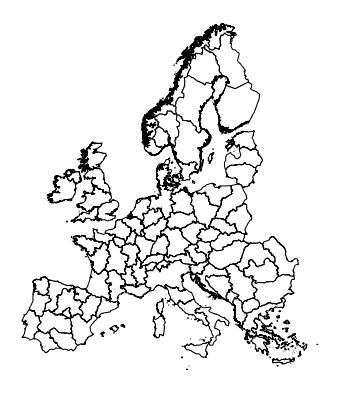

In [8]:
plot = gdf.plot(figsize=(7, 7), color='white', edgecolor='black')
plot.axis('off')


In [9]:
gdf.geom_type

0      MultiPolygon
1      MultiPolygon
2      MultiPolygon
3      MultiPolygon
4           Polygon
           ...     
99     MultiPolygon
100    MultiPolygon
101    MultiPolygon
102    MultiPolygon
103    MultiPolygon
Length: 96, dtype: object

# Get the plain map of Europe 

In [10]:
europe_boundary = gdf[['Europe', 'geometry']]
europe_boundary


,Europe,geometry
0,1,"MULTIPOLYGON (((2773867.155 2316315.102, 27735..."
1,1,"MULTIPOLYGON (((3246323.196 2328445.769, 32446..."
2,1,"MULTIPOLYGON (((3191850.084 2048908.768, 31917..."
3,1,"MULTIPOLYGON (((3412472.772 2215273.952, 34118..."
4,1,"POLYGON ((3498096.747 2050131.163, 3497818.773..."
...,...,...
99,1,"MULTIPOLYGON (((3340418.819 3681689.928, 33390..."
100,1,"MULTIPOLYGON (((3299486.143 3694513.323, 33005..."
101,1,"MULTIPOLYGON (((2929525.024 3413634.000, 29289..."
102,1,"MULTIPOLYGON (((4298686.373 1973479.178, 42983..."


In [11]:
europe_boundary['geometry'] = europe_boundary.buffer(0.01)


/home/s-patil/.conda/envs/spagat_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
final = europe_boundary.dissolve(by='Europe')
final

,geometry
Europe,
1,"MULTIPOLYGON (((4553308.408 1389761.838, 45533..."


(2463463.9421006376, 6257041.830004582, 1184519.352943975, 5617479.948646514)

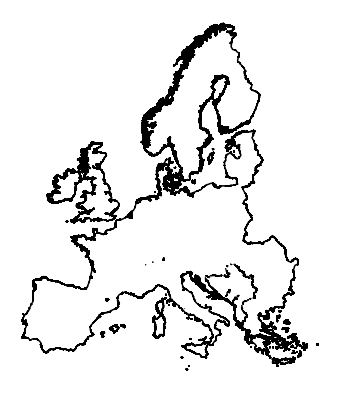

In [13]:
plot_europe_plain = final.plot(figsize=(7, 7), color='white', edgecolor='black', linewidth=1.5)
plot_europe_plain.axis('off')

In [15]:
#save the figure 
fig = plot_europe_plain.get_figure()
fig.savefig("/home/r-beer/share/map_export.png", dpi=300)


PermissionError: [Errno 13] Permission denied: '/home/r-beer/share/map_export.png'

# reduced granular map for presentation 

In [61]:
europe_boundary = gdf[['Central', 'geometry']]
europe_boundary

,Central,geometry
0,0,"MULTIPOLYGON (((2773867.155 2316315.102, 27735..."
1,0,"MULTIPOLYGON (((3246323.196 2328445.769, 32446..."
2,0,"MULTIPOLYGON (((3191850.084 2048908.768, 31917..."
3,0,"MULTIPOLYGON (((3412472.772 2215273.952, 34118..."
4,0,"POLYGON ((3498096.747 2050131.163, 3497818.773..."
...,...,...
99,0,"MULTIPOLYGON (((3340418.819 3681689.928, 33390..."
100,0,"MULTIPOLYGON (((3299486.143 3694513.323, 33005..."
101,0,"MULTIPOLYGON (((2929525.024 3413634.000, 29289..."
102,1,"MULTIPOLYGON (((4298686.373 1973479.178, 42983..."


In [62]:
europe_boundary['geometry'] = europe_boundary.buffer(0.01)
final = europe_boundary.dissolve(by='Central')
final

/home/s-patil/.conda/envs/spagat_py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,geometry
Central,
0,"MULTIPOLYGON (((5618318.762 1431390.987, 56183..."
1,"MULTIPOLYGON (((4553308.408 1389761.838, 45533..."


(2463463.9421006376, 6257041.830004582, 1184519.352943975, 5617479.948646514)

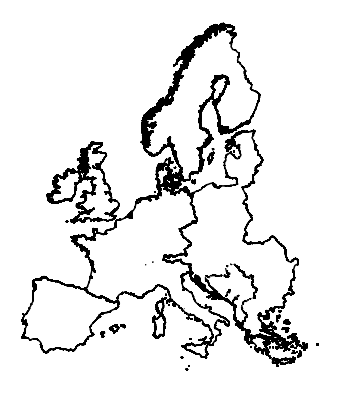

In [63]:
plot_europe_plain = final.plot(figsize=(7, 7), color='white', edgecolor='black', linewidth = 1.5)
plot_europe_plain.axis('off')

In [64]:
#save the figure 
fig = plot_europe_plain.get_figure()
fig.savefig("europe_central.png", dpi=300)


#### ---------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
ehighway_shapefile.head()

In [ ]:
import metis_utils.io_tools as ito

In [ ]:
ito.read_ehighway_shapefile

In [4]:
ehighway_shapefile['e-id'].

0        01_es
1        02_es
2        03_es
3        04_es
4        05_es
        ...   
164    94_uk_o
165    95_uk_o
166    96_ie_o
167    98_it_o
168    99_fr_o
Name: e-id, Length: 169, dtype: object

In [ ]:
#logger_grouping = logging.getLogger('spagat_grouping')


def string_based_clustering(regions):
    '''Creates a dictionary containing sup_regions and respective lists of sub_regions'''

    # TODO: this is implemented spefically for the e-id: '01_es' -> generalize this!
    nation_set = set([region_id.split('_')[1] for region_id in regions])

    sub_to_sup_region_id_dict = {}

    for nation in nation_set:
        sub_to_sup_region_id_dict[nation] = [region_id
                                             for region_id in regions
                                             if region_id.split('_')[1] == nation]

    return sub_to_sup_region_id_dict

In [ ]:
dict_ehighway = string_based_clustering(ehighway_shapefile['e-id'])

In [ ]:
ds = xr.open_dataset('tests/data/input/sds_xr_dataset.nc4')

In [ ]:
len(dict_ehighway.keys())

In [ ]:
ds.region_ids.item(0)


In [ ]:
string_based_clustering(ehighway_shapefile['e-id'])

In [ ]:
#test aggregate_time_series 

In [ ]:
def aggregate_time_series(xr_data_array_in, sub_to_sup_region_id_dict, mode='mean', xr_weight_array=None):
    """Aggregates all data of a data array containing time series with dimension 'sub_regions' to new data_array with
    dimension 'regions"""
    # TODO: maybe add this to SpagatDataset as method?
    # TODO: generalize dims -> 'regions' could be replaced by sth more general such as 'locs'

    time = xr_data_array_in.time

    regions = list(sub_to_sup_region_id_dict.keys())

    data_out_dummy = np.zeros((len(regions), time.shape[0]))

    xr_data_array_out = xr.DataArray(data_out_dummy.T, coords=[time, regions], dims=['time', 'regions'])

    for sup_region_id, sub_region_id_list in sub_to_sup_region_id_dict.items():
        if mode == 'mean':
            xr_data_array_out.loc[dict(regions=sup_region_id)] = xr_data_array_in.sel(
                regions=sub_region_id_list).mean(dim='region_ids').values

        if mode == 'weighted mean':
            weighted_xr_data_array_in = xr_data_array_in * xr_weight_array

            xr_data_array_out.loc[dict(regions =sup_region_id)] = weighted_xr_data_array_in.sel(
                region_ids=sub_region_id_list).sum(dim='region_ids').values / xr_weight_array.sel(
                region_ids=sub_region_id_list).sum(dim='region_ids').values

        if mode == 'sum':
            xr_data_array_out.loc[dict(region_ids=sup_region_id)] = xr_data_array_in.sel(
                region_ids=sub_region_id_list).sum(dim='region_ids').values

    return xr_data_array_out

In [ ]:
ds = xr.open_dataset('tests/data/input/sds_xr_dataset.nc4')
ds

In [ ]:
dict_ds = string_based_clustering(ds['region_ids'].values)
dict_ds

In [ ]:
time_series_aggregated = aggregate_time_series(ds, dict_ds, mode='mean', xr_weight_array=None)

In [ ]:
ds

In [ ]:
dict_ds.items()

In [ ]:
#mean; check 
time = ds.time

regions = list(dict_ds.keys())

data_out_dummy = np.zeros((len(regions), time.shape[0]))

xr_data_array_out = xr.DataArray(data_out_dummy.T, coords=[time, regions], dims=['time', 'regions'])

for sup_region_id, sub_region_id_list in dict_ds.items():
    xr_data_array_out.loc[dict(regions=sup_region_id)] = ds.sel(
                region_ids=sub_region_id_list).mean(dim='region_ids').values
    
      
     

In [11]:
ds = xr.open_dataset('/home/r-beer/share/outputs_cosmo_nc/onshore_poa_2015.nc4')

In [12]:
ds

<xarray.Dataset>
Dimensions:                          (time: 8760, x: 1000, y: 840)
Coordinates:
  * x                                (x) float64 2.452e+06 ... 7.448e+06
  * y                                (y) float64 1.352e+06 ... 5.548e+06
  * time                             (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00
Data variables:
    plane of array (POA) irradiance  (time, y, x) float32 ...
Attributes:
    xy_reference_system:  EPSG:3035

In [5]:
test_xr_dataset = ds.where(ds==1, other=1)
test_xr_dataset.to_netcdf('/home/r-beer/share/test_xr_dataset.nc4') 

PermissionError: [Errno 13] Permission denied: b'/home/r-beer/share/test_xr_dataset.nc4'